In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets

In [9]:
# Load the Diabetes dataset (you can replace it with any other dataset)
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']], columns= np.append(diabetes['feature_names'], 'target'))

In [10]:
# For simplicity, we will use only two features (you can change this as needed)
X = data[['bmi', 'bp']]
y = data['target']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Preprocessing: Standardize the data (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Create and train the Ridge Regression model
model = Ridge(alpha=1.0)  # You can adjust the alpha parameter based on your requirement
model.fit(X_train_scaled, y_train)

Ridge()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3738.1154223114554


In [16]:
# Cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation Scores: {cross_val_scores}')
print(f'Mean Cross-validation Score: {np.mean(cross_val_scores)}')

Cross-validation Scores: [0.38220841 0.25610823 0.42036971 0.52483483 0.29634969]
Mean Cross-validation Score: 0.37597417649928133


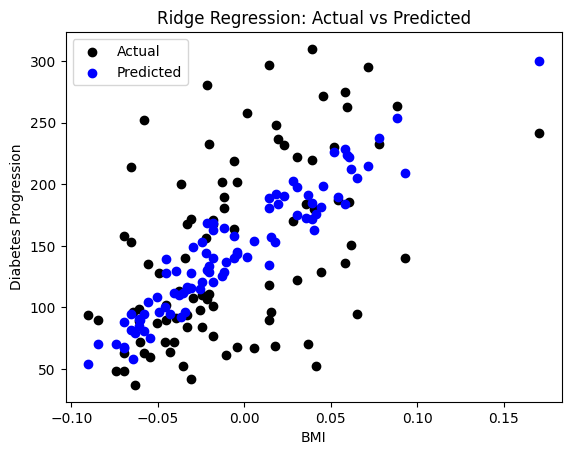

In [17]:
# Visualization
plt.scatter(X_test['bmi'], y_test, color='black', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='blue', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()